pixi run biolib run DTU/DeepTMHMM --fasta data/tmp/input.fa

In [2]:
#make sure the wd is "/workdir/hdd29/chloroplast_genome_evaluation"
#!/usr/bin/env python3
#print the working directory
import os
print("Current working directory:", os.getcwd())

Current working directory: /local/workdir/hdd29/chloroplast_genome_evaluation/notebooks


In [3]:
import json, pandas as pd, matplotlib.pyplot as plt

# load UniProt JSON
with open("../data/psbA_TM_uniprot.json") as f:
    data = json.load(f)
tm_uniprot = [(f["location"]["start"]["value"], f["location"]["end"]["value"]) 
              for f in data["features"] if f["type"]=="Transmembrane"]

# load DeepTMHMM GFF
tmhmm = []
with open("../biolib_results/TMRs.gff3") as f:
    for line in f:
        if line.startswith("#"): continue
        parts = line.split("\t")
        if parts[1]=="TMhelix":
            tmhmm.append((int(parts[2]), int(parts[3])))

# make dataframe
df = pd.DataFrame([
    *[(x[0],x[1],"UniProt") for x in tm_uniprot],
    *[(x[0],x[1],"DeepTMHMM") for x in tmhmm]
], columns=["start","end","source"])

df


,start,end,source
0,29,46,UniProt
1,118,133,UniProt
2,142,156,UniProt
3,197,218,UniProt
4,274,288,UniProt
5,32,49,DeepTMHMM
6,115,130,DeepTMHMM
7,144,156,DeepTMHMM
8,197,214,DeepTMHMM
9,274,288,DeepTMHMM


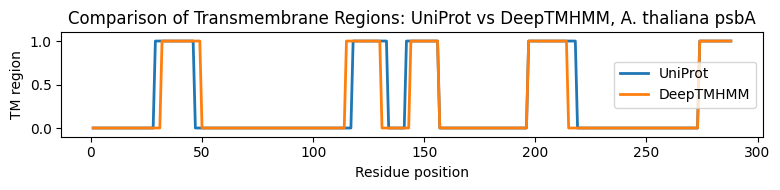

In [7]:
import numpy as np, matplotlib.pyplot as plt, json, pandas as pd

with open("../data/psbA_TM_uniprot.json") as f:
    data=json.load(f)
tm_uniprot=[(f["location"]["start"]["value"],f["location"]["end"]["value"]) 
            for f in data["features"] if f["type"]=="Transmembrane"]

tmhmm=[]
with open("../biolib_results/TMRs.gff3") as f:
    for line in f:
        if not line.startswith("#"):
            p=line.split("\t")
            if p[1]=="TMhelix":
                tmhmm.append((int(p[2]),int(p[3])))

seq_len=max(max(e for _,e in tm_uniprot),max(e for _,e in tmhmm))
x=np.arange(1,seq_len+1)
y_uni=np.zeros(seq_len)
y_tmhmm=np.zeros(seq_len)
for s,e in tm_uniprot: y_uni[s-1:e]=1
for s,e in tmhmm: y_tmhmm[s-1:e]=1

plt.figure(figsize=(8,2))
plt.plot(x,y_uni,label="UniProt",lw=2)
plt.plot(x,y_tmhmm,label="DeepTMHMM",lw=2)
plt.ylim(-0.1,1.1)
plt.xlabel("Residue position")
plt.ylabel("TM region")
#add title
plt.title("Comparison of Transmembrane Regions: UniProt vs DeepTMHMM, A. thaliana psbA")
plt.legend()
plt.tight_layout()
plt.show()
